<a href="https://colab.research.google.com/github/Rashid71200/Image_Classifier_Using_The_Sequential_API/blob/main/Building_an_Image_Classifier_Using_The_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras


In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.image as mpimg

In [5]:
import numpy as np


In [6]:
import pandas as pd

In [7]:
fashion_mnist = keras.datasets.fashion_mnist


In [8]:
(X_train_full, y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [9]:
print(len(X_train_full))

60000


In [10]:
X_valid, X_train = X_train_full[ :10000] / 255.0, X_train_full[50000: ] / 255.0

In [11]:
y_valid, y_train = y_train_full[ :10000], y_train_full[50000: ]

In [33]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandel", "Shirt", "Sneaker", "Bag", "Ankel boot"]



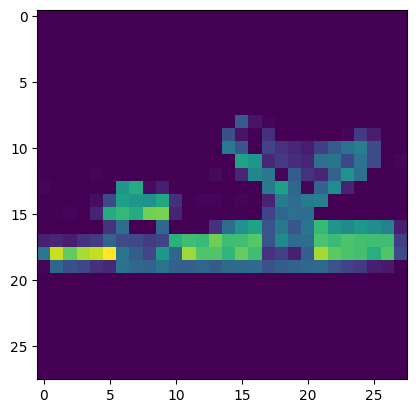

In [13]:
plt.imshow(X_train[9999])

In [14]:
print(class_name[y_train[9999]])

Sandel


In [15]:
# Now let's build our Neural network! 

In [16]:
model = keras.models.Sequential()

In [17]:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

In [18]:
model.add(keras.layers.Dense(300, activation="relu"))

In [19]:
model.add(keras.layers.Dense(100, activation="relu"))

In [20]:
#from tensorflow.python.ops.gen_nn_ops import softmax
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])


In [23]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
313/313 [==============================] - 3s 7ms/step - loss: 1.1587 - accuracy: 0.6438 - val_loss: 0.7990 - val_accuracy: 0.7354
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 0.7094 - accuracy: 0.7614 - val_loss: 0.6985 - val_accuracy: 0.7447
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6180 - accuracy: 0.7885 - val_loss: 0.5883 - val_accuracy: 0.7996
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.5673 - accuracy: 0.8024 - val_loss: 0.6069 - val_accuracy: 0.7866
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5370 - accuracy: 0.8111 - val_loss: 0.6023 - val_accuracy: 0.7856
Epoch 6/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5154 - accuracy: 0.8204 - val_loss: 0.5132 - val_accuracy: 0.8232
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.4947 - accuracy: 0.8267 - val_loss: 0.5239 - val_accuracy: 0.815

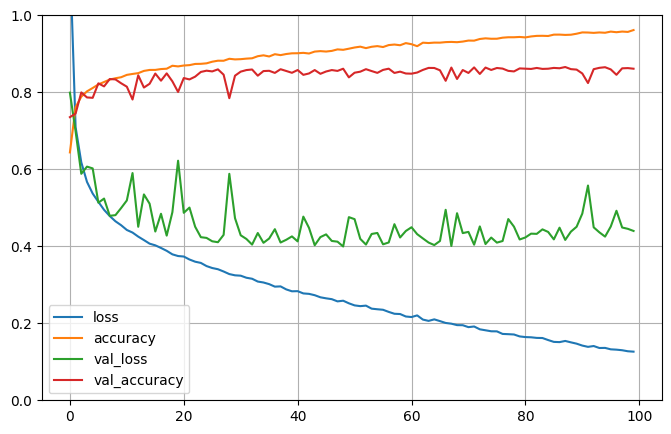

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 111.7638 - accuracy: 0.8241


[111.76380920410156, 0.8241000175476074]

In [44]:
X_new = X_test[:1]

In [45]:
print(len(X_new))

1


In [46]:
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 20ms/step


In [47]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

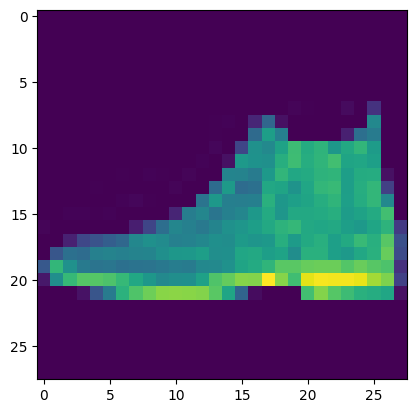

In [49]:
plt.imshow(X_test[0])

313/313 [==============================] - 0s 1ms/step


In [37]:
print(y_pred[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.99999994]
